In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("PrePlacement.csv")

In [3]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [4]:
import seaborn as sns

In [5]:
#!pip install seaborn

C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


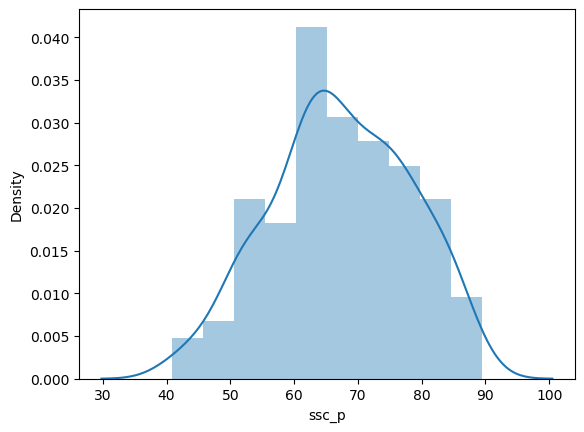

In [6]:
sns.distplot(dataset["ssc_p"])

In [7]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

---

### **Function Definition**
```python
def get_pdf_probability(dataset, startrange, endrange):
```
- **Purpose**: Calculates the probability of values in `dataset` falling between `startrange` and `endrange` under a normal distribution assumption.
- **Parameters**:
  - `dataset`: Input data (list/array)
  - `startrange`: Lower bound of the range
  - `endrange`: Upper bound of the range

---

### **1. Visualization Setup**
```python
from matplotlib import pyplot
from scipy.stats import norm
import seaborn as sns
```
- **Imports**:
  - `pyplot`: For plotting vertical lines
  - `norm`: For normal distribution calculations
  - `seaborn`: For enhanced data visualization

```python
ax = sns.distplot(dataset, kde=True, kde_kws={'color':'blue'}, color='Green')
```
- **Action**:
  - Plots a histogram of `dataset` with green bars
  - Overlays a Kernel Density Estimate (KDE) curve in blue

```python
pyplot.axvline(startrange, color='Red')
pyplot.axvline(endrange, color='Red')
```
- **Action**:
  - Draws red vertical lines at `startrange` and `endrange` to mark the probability area of interest.

---

### **2. Calculate Distribution Parameters**
```python
sample = dataset
sample_mean = sample.mean()
sample_std = sample.std()
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
```
- **Action**:
  - Computes the **mean (μ)** and **standard deviation (σ)** of the dataset
  - Prints them with 3 decimal precision (e.g., `Mean=50.000, Standard Deviation=10.000`)

---

### **3. Define Normal Distribution**
```python
dist = norm(sample_mean, sample_std)
```
- **Action**:
  - Creates a normal distribution object `dist` with the calculated μ and σ.

---

### **4. Probability Calculations**
```python
values = [value for value in range(startrange, endrange)]
```
- **Action**:
  - Generates a list of integer values from `startrange` to `endrange-1`.

```python
probabilities = [dist.pdf(value) for value in values]
```
- **Action**:
  - Calculates the **Probability Density Function (PDF)** for each value in the range.
  - **PDF** gives the relative likelihood (not the actual probability).

```python
prob = sum(probabilities)
```
- **Action**:
  - Sums all PDF values (approximates the area under the curve between the ranges).

```python
print("The area between range({},{}):{}".format(startrange, endrange, sum(probabilities)))
```
- **Output**:
  - Prints the summed probability (e.g., `The area between range(40,60): 0.682` for 1σ range).

---


Mean=67.303, Standard Deviation=10.827
The area between range(40,40):0


C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


0

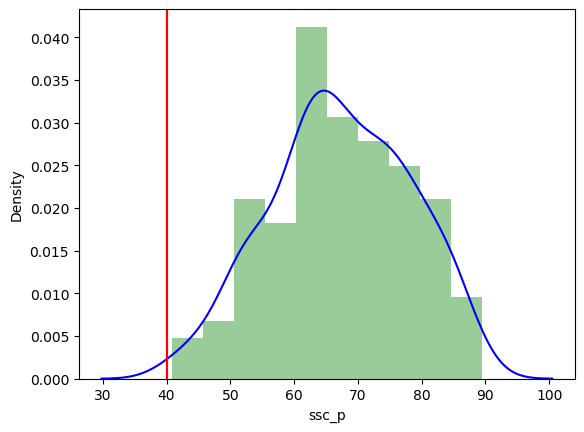

In [8]:
get_pdf_probability(dataset["ssc_p"],40,40)

In [11]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
ecdf(80)

0.8651162790697674

In [10]:
#!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 9.1 MB/s eta 0:00:00
     -------------------------------------- 232.9/232.9 kB 7.2 MB/s eta 0:00:00


In [12]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()



### **Purpose**
Converts a dataset to **Standard Normal Distribution** (μ=0, σ=1) and plots it.

### **Code Breakdown**

```python
def stdNBgraph(dataset):
    # Calculate mean and standard deviation
    mean = dataset.mean()  # μ (mean)
    std = dataset.std()    # σ (standard deviation)

    # Convert each value to Z-score: (X - μ)/σ
    z_score = [((j - mean)/std) for j in dataset]

    # Plot the standardized distribution
    sns.distplot(z_score, kde=True)  # Histogram + KDE curve

    # The following lines are unused but hint at verification:
    sum(z_score)/len(z_score)  # Should be ≈0 (new mean)
    # z_score.std()            # Should be ≈1 (new std dev)
```

### **Key Points**
1. **Z-Score Transformation**  
   - Converts raw data to standard normal values using:  

2. **Resulting Distribution**  
   - **Mean (μ) = 0**  
   - **Standard Deviation (σ) = 1**  

3. **Verification** (Unused in code but useful):  
   ```python
   print("New mean:", np.mean(z_score))      # ≈0
   print("New std dev:", np.std(z_score))    # ≈1
   ```
4. **Visualization**  
   - Uses Seaborn's `distplot` (now replaced with `histplot` in newer versions) to show:  
     - Histogram of standardized data  
     - KDE curve (smoothed probability density)  


### **Why Use This?**
- Compare different datasets on the same scale  
- Identify outliers (|Z-score| > 3 is rare)  
- Prepare data for machine learning algorithms that assume standardization  

### Z-SCORE

Z-Score: Converting any standard deviation to standard deviation

Purpose: To find the probability area

Method: Converting the normal distribution to standard normal distribution

Application: Compare two different teams under common conditions


C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


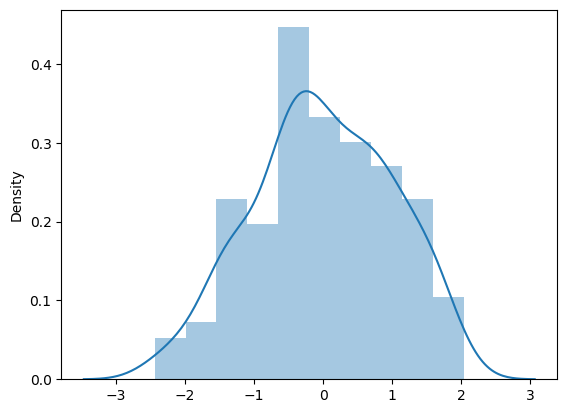

In [13]:
stdNBgraph(dataset["ssc_p"])